In [1]:
import sys
sys.path.append(r'C:\Users\User\Desktop\P1_WS2024\P1_WS2024_1.2\Consensus_Clustering')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from consensusClustering import ConsensusCluster

print("Module imported successfully!")


Module imported successfully!


In [2]:
import warnings
warnings.filterwarnings("ignore")

## Load and Visualize datapair

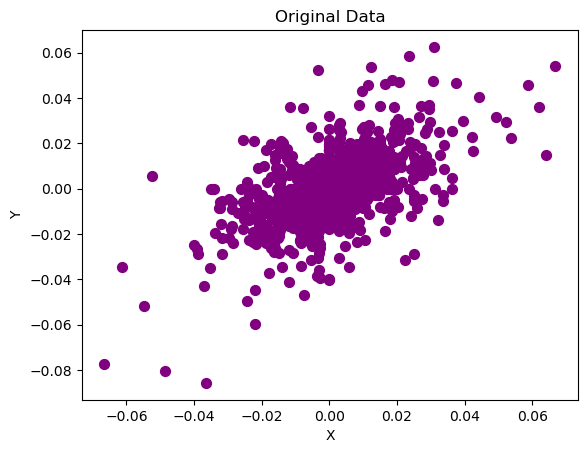

In [3]:
# Load dataset
data = pd.read_csv('datasets/pair0065.txt', sep=r'\s+', header=None, names=['X', 'Y'])

# Visualize the data
plt.scatter(data['X'], data['Y'], s=50, c='purple')
plt.title("Original Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


# Approach 1

## Find the Number of Moduses for X and Y Separately

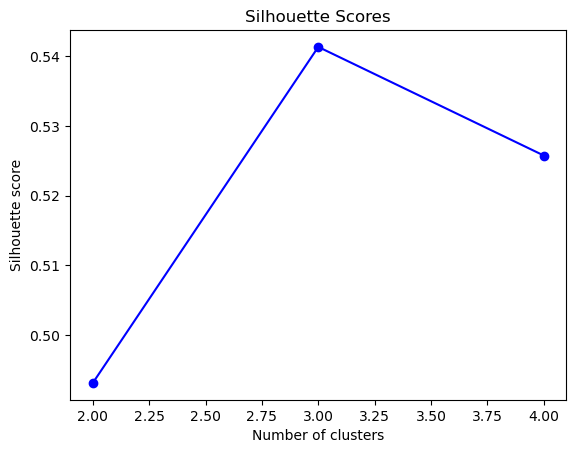

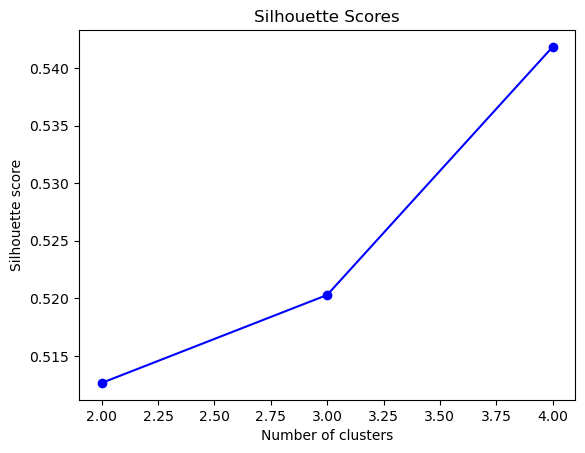

Optimal number of clusters for X (k_X): 3
Optimal number of clusters for Y (k_Y): 4


In [4]:
def find_optimal_clusters(data, max_clusters=4):
    """
    Finds the optimal number of clusters for a dataset using the silhouette score.

    Parameters:
    - data (array-like): Input data to cluster.
    - max_clusters (int): Maximum number of clusters to evaluate - considered 6 as max.

    Returns:
    - int: Optimal number of clusters based on the highest silhouette score.
    """
    silhouette_scores = []
    for k in range(2, max_clusters + 1):  # Evaluate from 2 to max_clusters
        kmeans = KMeans(n_clusters=k, random_state=42)  # Initialize k-means
        labels = kmeans.fit_predict(data)  # Compute cluster labels
        score = silhouette_score(data, labels)  # Calculate silhouette score
        silhouette_scores.append(score)  # Store the score
    
    # Plot silhouette scores against the number of clusters
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', color='blue')
    plt.title("Silhouette Scores")
    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette score")
    plt.show()
    
    # Return the optimal number of clusters (index + 2 for alignment) 
    # e.g. The index 0 corresponds to 2 clusters, index 1 corresponds to 3 clusters and so on
    
    return np.argmax(silhouette_scores) + 2

# Extract X and Y dimensions from the data
X_dim = data[['X']].values  # Extract the X dimension
Y_dim = data[['Y']].values  # Extract the Y dimension

# Find the optimal number of clusters for X and Y dimensions
k_X = find_optimal_clusters(X_dim, max_clusters=4)
k_Y = find_optimal_clusters(Y_dim, max_clusters=4)

# Display results
print(f"Optimal number of clusters for X (k_X): {k_X}")
print(f"Optimal number of clusters for Y (k_Y): {k_Y}")


## Decide number of clusters to use for consensus clustering

In [5]:
k_final = max(k_X, k_Y)  # Or use max(k_X, k_Y), depending on the requirement
print(f"Number of clusters for consensus clustering: {k_final}")

Number of clusters for consensus clustering: 4


## Apply Consensus Clustering

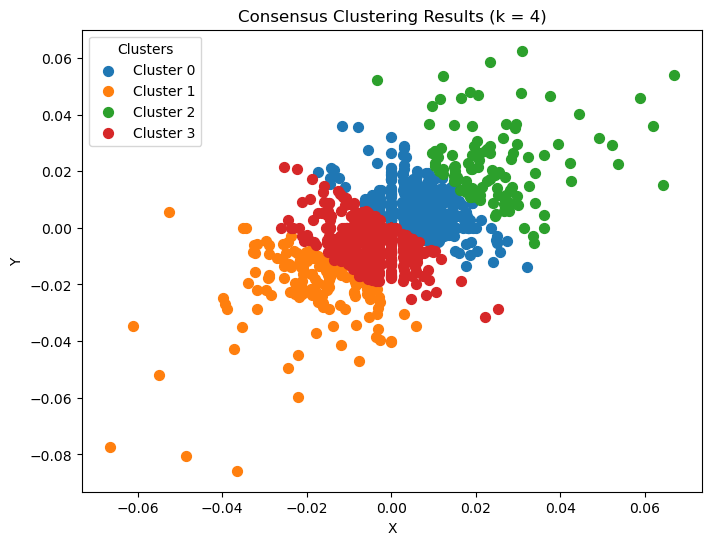

In [6]:
# Set a global random seed
np.random.seed(42)

# Initialize ConsensusCluster
consensus_clustering = ConsensusCluster(
    cluster=lambda n_clusters: KMeans(n_clusters=n_clusters, random_state=42),
    L=k_final,                  # Use k_final for the range of clusters
    K=k_final,                  # Fixed to k_final
    H=100,                       # Number of resampling iterations  
    resample_proportion=0.5    
    
    # Proportion of data sampled for evaluating cluster stability. 
    # Cluster labels may change due to resampling, as different data subsets are used in each iteration.

)

# Fit consensus clustering on the full dataset (X and Y combined)
consensus_clustering.fit(data.values, verbose=True)

# Get final cluster labels
final_labels = consensus_clustering.predict_data(data.values)

plt.figure(figsize=(8, 6))

# Iterate over unique cluster labels and plot points by cluster
for cluster in np.unique(final_labels):
    cluster_data = data[final_labels == cluster]  # Filter data for the cluster
    plt.scatter(
        cluster_data['X'], cluster_data['Y'],
        label=f'Cluster {cluster}',  
        s=50
    )

plt.title(f"Consensus Clustering Results (k = {k_final})")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(title="Clusters", loc="best") 
plt.show()



In [7]:
data['Cluster'] = final_labels
print(data.head())

          X         Y  Cluster
0 -0.054848 -0.051953        1
1 -0.061191 -0.034754        1
2  0.061814  0.036005        2
3 -0.009174 -0.004936        3
4 -0.021549 -0.020045        1


### Note:
- We used silhouette scores to find the best number of clusters (k_X and k_Y), then chose the maximum (k_final) as the final cluster number and applied consenus clustering on that.
- Strength: It's quick and simple but may not fully capture cluster stability.

# Approach 2

### Using Consensus Clustering to Find the Best k

Now this script will allow the ConsensusCluster class to choose the best number of clusters based on its own internal logic.

In [8]:
# Instead of fixing k_final, we will explore a range of k values (L to K)

L = 2  # Start with a smaller number of clusters
K = 5  # Try up to 5 clusters
H = 30  # Number of resamplings
resample_proportion = 0.5

# Initialize ConsensusCluster
consensus_clustering = ConsensusCluster(
    cluster=lambda n_clusters: KMeans(n_clusters=n_clusters),
    L=L,  
    K=K,  
    H=H,  
    resample_proportion=resample_proportion
)

# Fit consensus clustering on the full dataset (X and Y combined)
consensus_clustering.fit(data.values, verbose=True)

# Get the best number of clusters determined by consensus clustering
best_k = consensus_clustering.bestK
print(f"Best number of clusters determined by consensus clustering: {best_k}")

# Get final cluster labels using the best number of clusters
final_labels = consensus_clustering.predict_data(data.values)


At k = 2, aka. iteration = 0
	At resampling h = 0, (k = 2)
	At resampling h = 1, (k = 2)
	At resampling h = 2, (k = 2)
	At resampling h = 3, (k = 2)
	At resampling h = 4, (k = 2)
	At resampling h = 5, (k = 2)
	At resampling h = 6, (k = 2)
	At resampling h = 7, (k = 2)
	At resampling h = 8, (k = 2)
	At resampling h = 9, (k = 2)
	At resampling h = 10, (k = 2)
	At resampling h = 11, (k = 2)
	At resampling h = 12, (k = 2)
	At resampling h = 13, (k = 2)
	At resampling h = 14, (k = 2)
	At resampling h = 15, (k = 2)
	At resampling h = 16, (k = 2)
	At resampling h = 17, (k = 2)
	At resampling h = 18, (k = 2)
	At resampling h = 19, (k = 2)
	At resampling h = 20, (k = 2)
	At resampling h = 21, (k = 2)
	At resampling h = 22, (k = 2)
	At resampling h = 23, (k = 2)
	At resampling h = 24, (k = 2)
	At resampling h = 25, (k = 2)
	At resampling h = 26, (k = 2)
	At resampling h = 27, (k = 2)
	At resampling h = 28, (k = 2)
	At resampling h = 29, (k = 2)
At k = 3, aka. iteration = 1
	At resampling h = 0, 

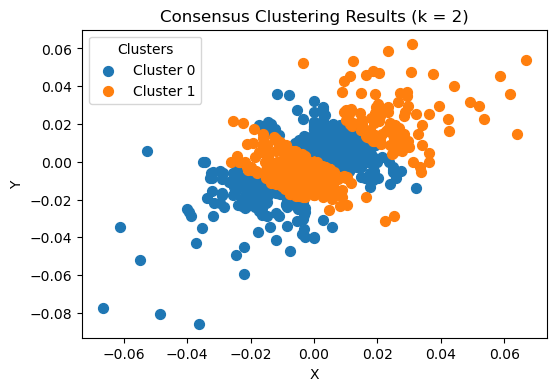

In [9]:
# Visualize the clustering results
plt.figure(figsize=(6, 4))

# Iterate over unique cluster labels and plot points by cluster
for cluster in np.unique(final_labels):
    cluster_data = data[final_labels == cluster]  
    plt.scatter(
        cluster_data['X'], cluster_data['Y'],
        label=f'Cluster {cluster}',  
        s=50
    )

plt.title(f"Consensus Clustering Results (k = {best_k})")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(title="Clusters", loc="best") 
plt.show()


In [10]:
# add the labels to the data to inspect them
data['Cluster_Label'] = final_labels

print(data.head()) 

          X         Y  Cluster  Cluster_Label
0 -0.054848 -0.051953        1              0
1 -0.061191 -0.034754        1              0
2  0.061814  0.036005        2              1
3 -0.009174 -0.004936        3              1
4 -0.021549 -0.020045        1              0


Two labels (CLuster, CLuster_label) for different approaches